# Punto 4

In [548]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [549]:
x=np.array([1, 1.5, 2, 2.5, 3, 3.5 , 4, 4.5, 5, 5.5, 6])
y=np.array([0.16,0.28,0.38,0.47,0.60,0.73,0.79,0.87,0.84,0.86,0.96])
R_regresiones = {}

## Funciones decenso del gradiente

In [550]:
"""Parametros -> o0 y o1
   labels (Etiquetas) -> resultados 
   characteristics -> entradas
   Función de costo que el entran los dos thetas, X y Y
"""
def costo(theta0,theta1,x,y):
  #donde theta0 y theta1 son los parámetros a probar,
  #x y y son nparrays de la misma dimensión
  n=x.size
  #aqui podrian depurar que los tamaños de los arreglos sean iguales

  #calculo del costo en la variable J
  J=(1/(2*n))*np.sum(np.power(( (theta0+theta1*x)-(y) ),2)) #terminen ustedes... 
  time.sleep(1)
  return J
"""
 Función de theta0 que el entran los dos thetas, X y Y
"""
def gradientetheta0(theta0,theta1,x,y):
  n=x.size# para normalizar el número de muestras
  return (1/n)*np.sum(( (theta0+theta1*x)-(y) ))
"""
 Función de theta1 que el entran los dos thetas, X y Y
"""
def gradientetheta1(theta0,theta1,x,y):
  n=x.size# para normalizar el número de muestras
  return (1/n)*np.sum( ((theta0+theta1*x)-(y))*x )

def Paso_Descenso_Gradiente(alpha,theta0,theta1,x,y):
  G0=gradientetheta0(theta0,theta1,x,y)
  G1=gradientetheta1(theta0,theta1,x,y)
  
  theta0km1=theta0-alpha*G0
  theta1km1=theta1-alpha*G1
  return theta0km1,theta1km1

## Calculo R²

Se uso la siguiente definicion para calcular el coeficiente de determinación 

![title](images/correlation.png)

![title](images/formula.png)


In [551]:
def RSS(model_values, y):
    """Suma del cuadrado de los residuos
    Args:
        model_values (nparray): Valores de la regresion
        y (nparray): Valores reales o etiquetas

    Returns:
        Valor numerico: RSS
    """
    aux = np.sum(np.power((y - model_values), 2))
    print(f"RSS: {aux}")
    return aux
def TSS(y):
    """Suma total de los cuadrados
    Args:
        y (nparray): Valores reales o etiquetas

    Returns:
        Valor numerico: TSS
    """
    aux = np.sum(np.power((y - np.mean(y)),2))
    print(f"TSS: {aux}")
    return aux
def r_calculation(model_values, y):
    """ Calculo de R² con las dos funciones anteriores
    Args:
        model_values (np array): Valores de la regresion
        y ([type]): Valores reales o etiquetas

    Returns:
        Valor numerico: R²
    """
    return 1 - (RSS(model_values, y)/TSS(y))

### Iteracion para el descenso del gradiente

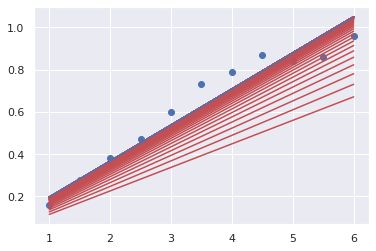

In [552]:
"""Se iteran los valores de theta0-1 para llegar a un mínimo 
"""
theta0 = 0.001
theta1 = 0.1
alpha = 0.01

for i in range(100):
    theta0, theta1 = Paso_Descenso_Gradiente(alpha,theta0,theta1,x,y)
    plt.plot(x, theta0+theta1*x,c='r')
plt.scatter(x,y)
plt.plot(x, theta0+theta1*x)

In [553]:
model_values = theta0 + theta1 * x
R_regresiones["regresion_lineal_0"] = (r_calculation(model_values, y))
print(f"R²: {R_regresiones['regresion_lineal_0']}")

RSS: 0.04978275271881748
TSS: 0.731490909090909
R²: 0.9319434430419824


# Punto 6

## Extraccion de datos del archivo CSV

In [554]:
train = pd.read_csv("country_vaccinations.csv")

In [555]:
data = pd.DataFrame(train, columns=['country','daily_vaccinations'])
data = data.fillna(0)
countrys = np.array(data['country'])
all_labels = np.array(data['daily_vaccinations'])

In [556]:
"""Se debe hallar los indices de inicio y final para poder tener solo los vectores 
"""
last_idx = None
first_idx = None
for idx, country in enumerate(countrys):
    if 'Colombia' == country:
        if first_idx == None:
            first_idx = idx
        else:
            last_idx = idx
        

### Datos de Colombia

In [557]:

x_features = [i+1 for i in range(last_idx-first_idx)]
x_features = np.array(x_features)
y_labels = all_labels[first_idx:last_idx]

## Regresion lineal
### Iteraciones para el descenso del gradiente

Text(0, 0.5, 'Etiquetas')

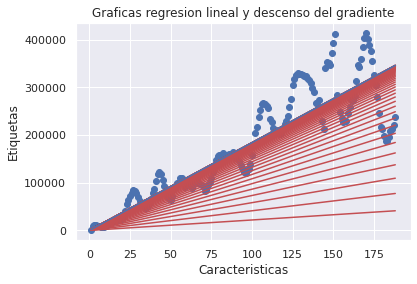

In [558]:
theta0 = 0.01
theta1 = 0.01
alpha = 1e-5
#Se puede usar una alpha de 1e-14 para que converja mas rápido
#Por el bien de la gráfica se dejo 1e-15 :)
for i in range(50):
    theta0, theta1 = Paso_Descenso_Gradiente(alpha,theta0,theta1,x_features,y_labels)
    plt.plot(x_features, theta0+theta1*x_features,c='r')
    
plt.scatter(x_features,y_labels)
plt.plot(x_features, theta0+theta1*x_features)
plt.title("Graficas regresion lineal y descenso del gradiente")
plt.xlabel("Caracteristicas")
plt.ylabel("Etiquetas")

In [559]:
model_values = theta0 + theta1 * x_features
R_regresiones["regresion_lineal_1"] = r_calculation(model_values, y_labels)
print(f"R: {R_regresiones[1]}")

RSS: 482331822387.36566
TSS: 2286858085316.0


KeyError: 1

<AxesSubplot:>

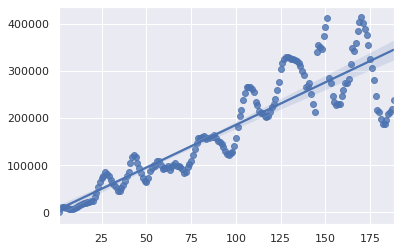

In [ ]:
sns.set_theme(color_codes=True)
sns.regplot(x=x_features, y = y_labels)

## Polinomial Segundo Orden


### Método de matrices

In [ ]:
"""Bloque:
    - Renombre de vectores
    - Creacion de las matrices a partir de los vectores
    - Verificacion de los tamaños de las matrices
"""
x1 = x_features
x1_cuadrado = np.power(x_features, 2) #Representaria el cambio de variable
x0 = np.ones(x_features.shape)
X = np.matrix([x0,x1,x1_cuadrado]).T
Y = np.matrix([y_labels]).T
print("shape x0",x0.shape,"shape x1",x1.shape,"shape X",X.shape,"shape Y",Y.shape)

shape x0 (188,) shape x1 (188,) shape X (188, 3) shape Y (188, 1)


In [ ]:
"""Bloque:
    - Se hace la ecuacion normal para hallar los parámetros mediante la pseudoinversa
"""
Theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot((X.T),Y))
print(Theta)

[[-2.65263037e+04]
 [ 2.79701497e+03]
 [-5.24437799e+00]]


RSS: 445333083481.4969
TSS: 2286858085316.0
R: 0.8052642241593403


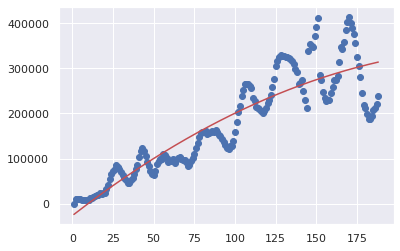

In [ ]:
plt.scatter(x_features,y_labels)
aux = (Theta[0, 0] + Theta[1, 0]*x1 + Theta[2, 0]*x1_cuadrado)
R_regresiones['regresion_polinomial_orden_2'] = r_calculation(aux,y_labels)
print(f"R: {R_regresiones['regresion_polinomial_orden_2']}")
plt.plot(x_features,aux,c="r")

## Regresion Polinomial: Tercer Orden

In [ ]:
x1 = x_features
x1_cuadrado = np.power(x_features, 2) #Representaria el cambio de variable
x1_cubo = np.power(x_features, 3) #Representaria el cambio de variable
x0 = np.ones(x_features.shape)
X = np.matrix([x0,x1,x1_cuadrado,x1_cubo]).T
Y = np.matrix([y_labels]).T
print("shape x0",x0.shape,"shape x1",x1.shape,"shape X",X.shape,"shape Y",Y.shape)

shape x0 (188,) shape x1 (188,) shape X (188, 4) shape Y (188, 1)


In [ ]:
Theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot((X.T),Y))
print(Theta)

[[ 3.94348379e+04]
 [-1.33627332e+03]
 [ 4.92839837e+01]
 [-1.92339900e-01]]


RSS: 335707064659.0432
TSS: 2286858085316.0
R: 0.8532016189309557


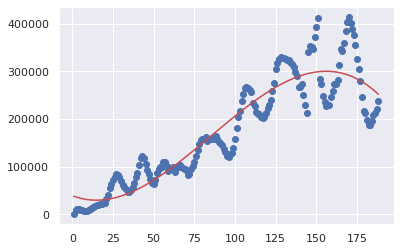

In [ ]:
plt.scatter(x_features,y_labels)
aux = (Theta[0, 0] + Theta[1, 0]*x1 + Theta[2, 0]*x1_cuadrado + Theta[3, 0]*x1_cubo)
R_regresiones['regresio_polinomial_orden_3'] = r_calculation(aux,y_labels)
print(f"R: {R_regresiones['regresio_polinomial_orden_3']}")
plt.plot(x_features,aux,c="r")

In [ ]:
print(R_regresiones)

[0.9319434430419824, 0.7890853719850672, 0.8052642241593403, 0.8532016189309557]
